In [3]:
# Importaciones de librerias

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings

# Ignorar todos los FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Celda 2: Leer y concatenar los archivos XLSX
archivos = ['datasets/2018.xlsx', 'datasets/2019.xlsx', 'datasets/2020.xlsx', 'datasets/2021.xlsx', 'datasets/2022.xlsx', 'datasets/2023.xlsx', 'datasets/2024.xlsx']

# Crear un dataframe vacío
df_final = pd.DataFrame()

# Iterar sobre cada archivo
for archivo in archivos:
    df = pd.read_excel(archivo)
    df_final = pd.concat([df_final, df], ignore_index=True)  # Concatenar los datos

print(df_final.head())

    Año    Mes                         Región  Frecuencia Año
0  2018  Enero  Región de Arica y Parinacota                2
1  2018  Enero             Región de Tarapacá               3
2  2018  Enero          Región de Antofagasta               1
3  2018  Enero              Región de Atacama               0
4  2018  Enero             Región de Coquimbo               3


In [5]:
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Año             1321 non-null   int64 
 1   Mes             1321 non-null   object
 2   Región          1321 non-null   object
 3   Frecuencia Año  1321 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 41.4+ KB
None


In [6]:
# Crear un mapeo de los meses en español a sus equivalentes en formato numérico
meses_traduccion = {
    'Enero': '01', 'Febrero': '02', 'Marzo': '03', 'Abril': '04', 'Mayo': '05',
    'Junio': '06', 'Julio': '07', 'Agosto': '08', 'Septiembre': '09',
    'Octubre': '10', 'Noviembre': '11', 'Diciembre': '12'
}

# Reemplazar los meses en español con su formato numérico
df_final['Mes_Num'] = df_final['Mes'].replace(meses_traduccion)

# Crear la columna 'Fecha' a partir de las columnas 'Año' y 'Mes_Num'
df_final['Fecha'] = pd.to_datetime(df_final['Año'].astype(str) + '-' + df_final['Mes_Num'] + '-01', format='%Y-%m-%d', errors='coerce')

# Verificar si hay valores NaN en la columna 'Fecha'
print(df_final['Fecha'].isnull().sum())

# Mostrar las primeras filas para confirmar que la columna 'Fecha' está correctamente generada
print(df_final.head())

0
    Año    Mes                         Región  Frecuencia Año Mes_Num  \
0  2018  Enero  Región de Arica y Parinacota                2      01   
1  2018  Enero             Región de Tarapacá               3      01   
2  2018  Enero          Región de Antofagasta               1      01   
3  2018  Enero              Región de Atacama               0      01   
4  2018  Enero             Región de Coquimbo               3      01   

       Fecha  
0 2018-01-01  
1 2018-01-01  
2 2018-01-01  
3 2018-01-01  
4 2018-01-01  


In [8]:
print(df_final.isnull().sum()) #Check NaN

Año               0
Mes               0
Región            0
Frecuencia Año    0
Mes_Num           0
Fecha             0
dtype: int64


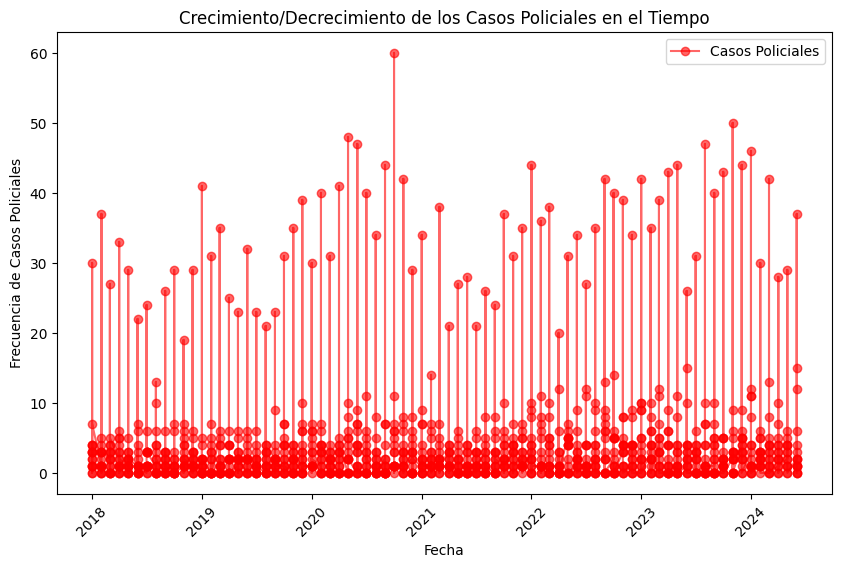

In [10]:
# Graficar la evolución de los casos policiales
plt.figure(figsize=(10, 6))
plt.plot(df_final['Fecha'], df_final['Frecuencia Año'], marker='o', color='red', label='Casos Policiales', alpha=0.6)
plt.title('Crecimiento/Decrecimiento de los Casos Policiales en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia de Casos Policiales')
plt.xticks(rotation=45)
plt.legend()

plt.show()

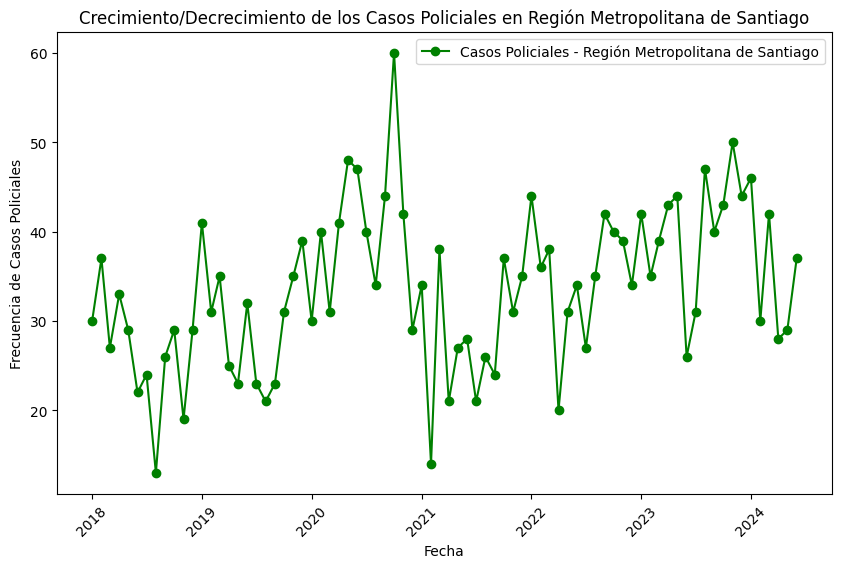

In [11]:
# Filtrar por una región específica
region = 'Región Metropolitana de Santiago'
df_region = df_final[df_final['Región'] == region]

plt.figure(figsize=(10, 6))
plt.plot(df_region['Fecha'], df_region['Frecuencia Año'], marker='o', color='green', label=f'Casos Policiales - {region}')

plt.title(f'Crecimiento/Decrecimiento de los Casos Policiales en {region}')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia de Casos Policiales')
plt.xticks(rotation=45)
plt.legend()

plt.show()

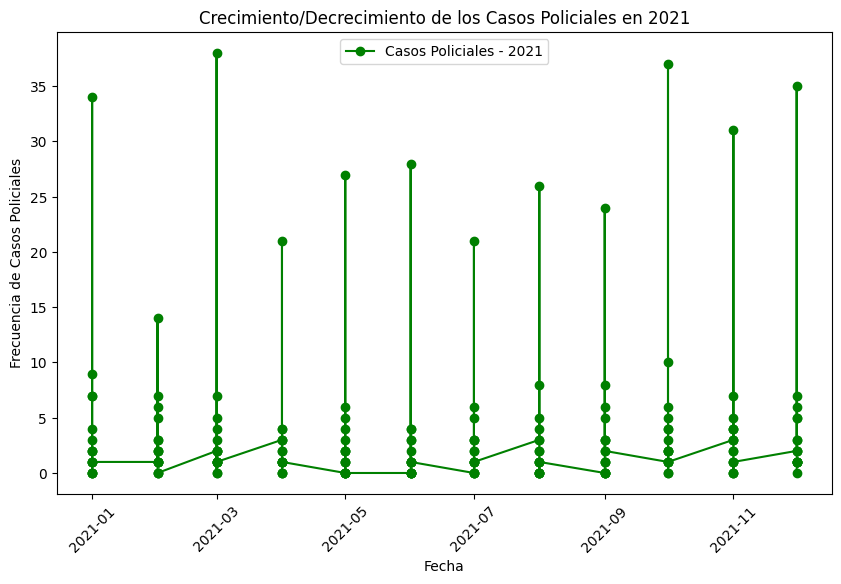

In [12]:
# Filtrar por año
año = 2021

df_region = df_final[df_final['Año'] == año]

plt.figure(figsize=(10, 6))
plt.plot(df_region['Fecha'], df_region['Frecuencia Año'], marker='o', color='green', label=f'Casos Policiales - {año}')

plt.title(f'Crecimiento/Decrecimiento de los Casos Policiales en {año}')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia de Casos Policiales')
plt.xticks(rotation=45)
plt.legend()

plt.show()

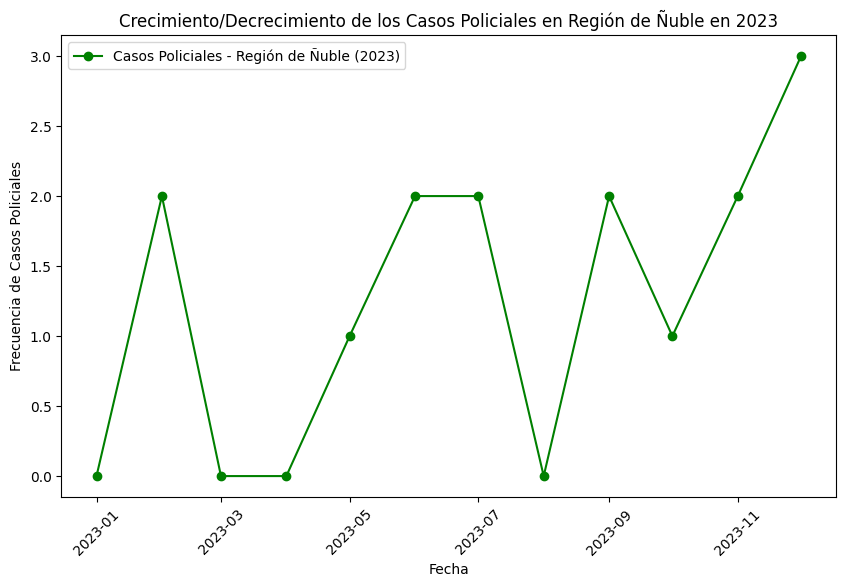

In [14]:
#Filtrar por región y año
region = 'Región de Ñuble'
año = 2023

df_region_año = df_final[(df_final['Región'] == region) & (df_final['Año'] == año)]

plt.figure(figsize=(10, 6))
plt.plot(df_region_año['Fecha'], df_region_año['Frecuencia Año'], marker='o', color='green', label=f'Casos Policiales - {region} ({año})')

plt.title(f'Crecimiento/Decrecimiento de los Casos Policiales en {region} en {año}')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia de Casos Policiales')
plt.xticks(rotation=45)
plt.legend()

plt.show()

15:18:46 - cmdstanpy - INFO - Chain [1] start processing
15:18:46 - cmdstanpy - INFO - Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2018-01-01  3.910157   -6.397428   13.427393
1 2018-02-01  3.351161   -7.227596   13.631691
2 2018-03-01  3.319293   -6.593164   13.247792
3 2018-04-01  2.804776   -7.147563   12.702433
4 2018-05-01  3.336559   -7.479939   13.404172


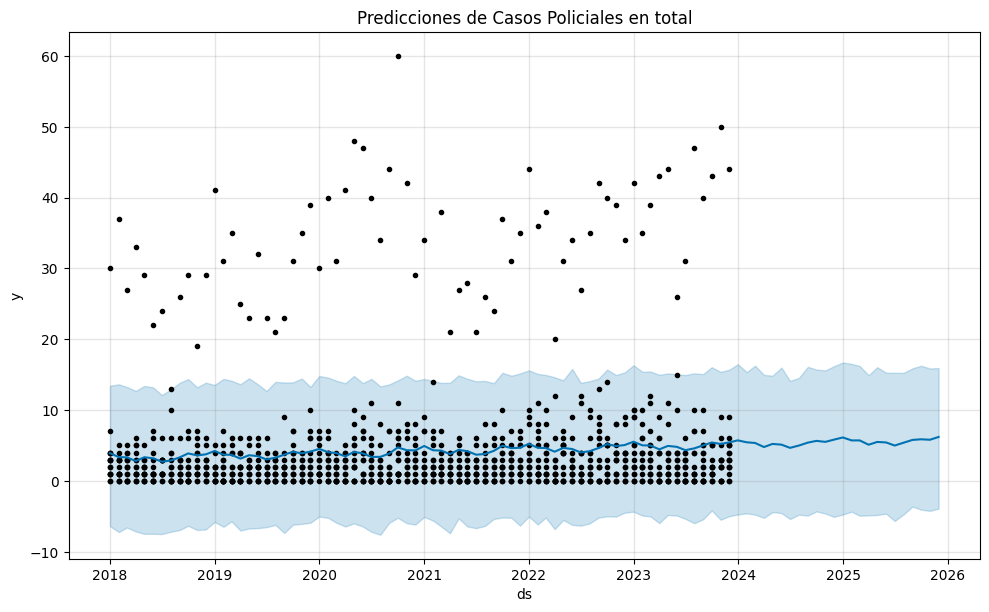

In [15]:
# Crear el DataFrame en el formato esperado por Prophet
df_prophet = df_final[['Fecha', 'Frecuencia Año']].rename(columns={'Fecha': 'ds', 'Frecuencia Año': 'y'})

# Entrenar el modelo con los datos históricos hasta 2023
df_train = df_prophet[df_prophet['ds'] < '2024-01-01']

# Crear y entrenar el modelo Prophet
modelo = Prophet()
modelo.fit(df_train)

# Crear un DataFrame con todos los datos con las fechas futuras en las que queremos hacer predicciones
futuro = modelo.make_future_dataframe(periods=24, freq='M')  # Predecir para los próximos 24 meses

# Hacer predicciones
predicciones = modelo.predict(futuro)

# Mostrar las primeras filas de las predicciones
print(predicciones[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# Graficar las predicciones
fig = modelo.plot(predicciones)
plt.title('Predicciones de Casos Policiales en total')
plt.show()

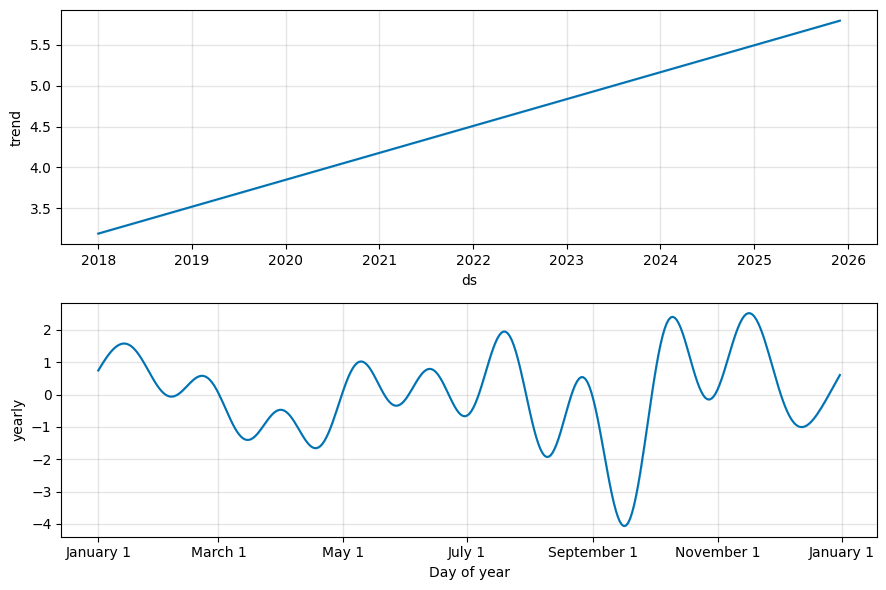

In [16]:
# Descomponer los componentes de las predicciones (tendencia, estacionalidad, etc.)
fig2 = modelo.plot_components(predicciones)
plt.show()

15:19:06 - cmdstanpy - INFO - Chain [1] start processing
15:19:06 - cmdstanpy - INFO - Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2018-01-01  0.471543   -0.715076    1.819666
1 2018-02-01  1.024379   -0.279056    2.346287
2 2018-03-01  0.631453   -0.705189    1.904819
3 2018-04-01  0.164011   -1.134595    1.546745
4 2018-05-01  0.993819   -0.301284    2.283659


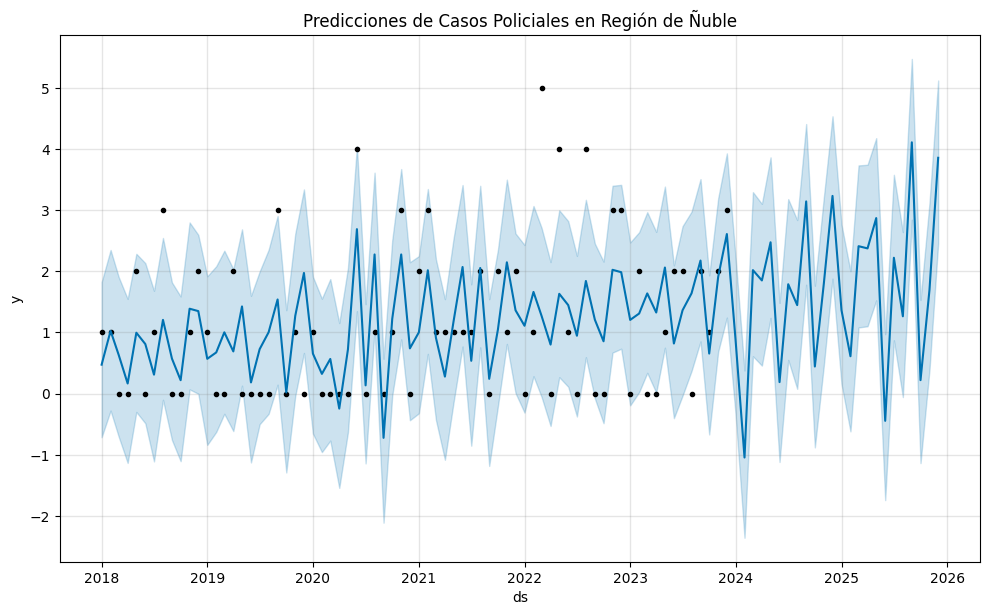

In [17]:
# Crear predicción por región

region = 'Región de Ñuble' #Puede ser 'Región Metropolitana de Santiago' por ejemplo
df_region = df_final[df_final['Región'] == region]

# Crear el DataFrame en el formato esperado por Prophet
df_prophet = df_region[['Fecha', 'Frecuencia Año']].rename(columns={'Fecha': 'ds', 'Frecuencia Año': 'y'})

# Entrenar el modelo con los datos históricos hasta 2023
df_train = df_prophet[df_prophet['ds'] < '2024-01-01']

# Entrenar modelo usando Prophet
modelo = Prophet()
modelo.fit(df_train)

# Crear un DataFrame para las fechas futuras
futuro = modelo.make_future_dataframe(periods=24, freq='M') # Predecir para los próximos 24 meses

# Hacer las predicciones
predicciones = modelo.predict(futuro)

# Mostrar las primeras filas de las predicciones
print(predicciones[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

# Graficar las predicciones
fig = modelo.plot(predicciones)
plt.title(f'Predicciones de Casos Policiales en {region}')
plt.show()